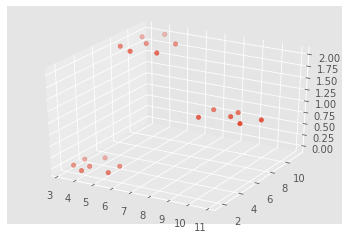

Total values: 20
row: 0 --- original: 1.0 predicted: 0.6136957653221323
Total values: 20
row: 1 --- original: 0.0 predicted: 0.3309422413046411
Total values: 20
row: 2 --- original: 0.0 predicted: 0.3615944401612895
Total values: 20
row: 3 --- original: 1.0 predicted: 0.786748898430185
Total values: 20
row: 4 --- original: 0.0 predicted: 0.32108544761741353
Total values: 20
row: 5 --- original: 0.0 predicted: 0.33681501435782146
Total values: 20
row: 6 --- original: 0.0 predicted: 0.3894449712617689
Total values: 20
row: 7 --- original: 1.0 predicted: 0.5704459874957241
Total values: 20
row: 8 --- original: 1.0 predicted: 0.8576508331931441
Total values: 20
row: 9 --- original: 1.0 predicted: 0.7078736438590976
Total values: 20
row: 10 --- original: 0.0 predicted: 0.32612068562595614
Total values: 20
row: 11 --- original: 0.0 predicted: 0.3574812334770044
Total values: 20
row: 12 --- original: 1.0 predicted: 0.6026184186589756
Total values: 20
row: 13 --- original: 1.0 predicted: 0.764

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

tr = np.array([[1,3.25,7.956,2],[1,3.3,2.2,0],[1,3.32,3.41,0],[1,3.35,10.272,2],[1,4.01,1.65,0],[1,4.03,2.51,0],[1,4.05,4.21,0],[1,4.05,7.38,2],[1,4.06,11.412,2],[1,4.07,9.198,2],[1,5.22,2.15,0],[1,5.24,3.41,0],[1,5.25,7.866,2],[1,5.28,10.008,2],[1,8.15,6.3,1],[1,8.23,7.95,1],[1,9.38,7.34,1],[1,9.4,8.21,1],[1,10.2,6.52,1],[1,10.8,7.72,1]])

# plot points
style.use('ggplot')

fig = plt.figure()
ax1 = fig.add_subplot(111,projection='3d')
x = tr[:,1]
y = tr[:,2]
z = tr[:,3]
ax1.scatter(x,y,z)

# show half of the point labels
for i in range(len(data)):
  if i%2==0:
    s = str(x[i])+str(y[i])
    #ax1.text(x[i],y[i],z[i],s)

plt.show()


# sigmoid function
def evaluate(theta, data, length):
  sum = 0
  for n in range(length):
    sum = sum + theta[n]*data[n]**2
    # x1^2 + x2^2 
    
  # 1/1+e^-(theta0+theta1*x1^2+theta2*x2^2)
  return 1/(1+np.exp(-sum))

# training data set
def training(tr_set):
  '''
    Description: tr_set -> multi dimension list for each training sample, like (1,x1,x2,y)
  '''
  (theta1,theta2,theta3)=(0,0,0)      # Initialize theta's value
  alpha=0.007						              # Set up learning rate
  m=len(tr_set)						            # Get number of samples in training set
  print("Total values:", m)
  iteration=4000
  while iteration > 0:
    dtheta1,dtheta2,dtheta3=0,0,0			# Initialize derivative value to big enough 
    theta_val = [theta1, theta2, theta3]
    for x in tr_set:
      # each iteration combines the previous theta values with (sigmoid - y) * x[i]
      evaluation = evaluate(theta_val, x, len(theta_val))

      dtheta1=dtheta1+(evaluation-x[3])*x[0]
      dtheta2=dtheta2+(evaluation-x[3])*x[1]
      dtheta3=dtheta3+(evaluation-x[3])*x[2]

    # gradient descent
    # theta - (1/m)alpha
    theta1=theta1-alpha*dtheta1/m
    theta2=theta2-alpha*dtheta2/m
    theta3=theta3-alpha*dtheta3/m

    iteration-=1
  
  return (theta1, theta2, theta3)


def pred(training_set,test_set):
  '''Description: test_set-list data type with programming score & ML score pred function return value is probability of getting job offer
  '''
  theta=training(training_set)
  return evaluate(theta, test_set, len(theta))

# normalize
tr[:,1]=(tr[:,1] - min(tr[:,1] )) / (max(tr[:,1])-min(tr[:,1]))  # normalization bwt 0~1
tr[:,2]=(tr[:,2] - min(tr[:,1] )) / (max(tr[:,2])-min(tr[:,2]))  # normalization bwt 0~1
tr[:,3]=(tr[:,3] - min(tr[:,1] )) / (max(tr[:,3])-min(tr[:,3]))  # normalization bwt 0~1

row=0
for test_tr in tr:
  print("row:", row, "---", "original:", test_tr[-1], "predicted:", pred(tr,test_tr)) # y's value
  row+=1

# predict next four values
new1 = np.array([1,4.01,3.02,1], dtype=float)
new2 = np.array([1,9.1,6.5,1], dtype=float)
new3 = np.array([1,3.5,9.5,1], dtype=float)
new4 = np.array([1,6.01,6.01,1], dtype=float)
print("Predicted values: ")
print(pred(tr, new1))
print(pred(tr, new2))
print(pred(tr, new3))
print(pred(tr, new4))